<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)
plt.rcParams.update({'errorbar.capsize': 3})
plt.rcParams['xtick.labelsize']= 13
plt.rcParams['ytick.labelsize']= 13
plt.rcParams.update({'axes.labelsize': 16})

In [3]:
%set_env CRDS_PATH $HOME/crds_cache
%set_env CRDS_SERVER_URL https://jwst-crds.stsci.edu

env: CRDS_PATH=$HOME/crds_cache
env: CRDS_SERVER_URL=https://jwst-crds.stsci.edu


In [4]:
from astropy.io import fits
import os

In [15]:
from jwst import datamodels


In [124]:
def explore_crosscuts(dat_2d,row_range=[0,-1],wl_range=[0,6]):
    #horizontal
    l=len(dat_2d.data)
    plt.figure(figsize=(15,3))
    for i,item in enumerate(dat_2d.data):
        cross_cut_horiz=np.sum(item[row_range[0]:row_range[1]],axis=0)
        plt.plot(cross_cut_horiz,color=(0,i*1./l,i*1./l))
    plt.figure(figsize=(15,3))
    w=np.nanmean(dat_2d.wavelength,axis=0)
    #print(w)
    for i,item in enumerate(dat_2d.data):
        loc=((w<=wl_range[1]) & (w>wl_range[0]))
        cross_cut_horiz=np.sum(item[:,loc],axis=1)
        plt.plot(cross_cut_horiz,color=(0,i*1./l,i*1./l))    
    cross_cut_vert=np.sum(dat_2d.data[0],axis=1)
    print(cross_cut_horiz.shape)

In [115]:
def explore_verticalcrosscuts(dat_2d,wl_bins=5):
    #horizontal
    plt.figure(figsize=(5,12))
    l=len(dat_2d.data)
    w=np.nanmean(dat_2d.wavelength,axis=0)
    #print(w)
    wmin=np.min(w)
    wmax=np.max(w)
    wrange=wmax-wmin
    wbin_range=wrange/wl_bins
    #print(wbin_range,wrange)
    for b in range(wl_bins):
        plt.subplot(wl_bins,1,b+1)
        w1=(wmin+(b+1)*wbin_range)
        w0=(wmin+(b)*wbin_range)
        loc=((w<=(wmin+(b+1)*wbin_range)) & (w>=(wmin+(b)*wbin_range)))
        plt.title(str(round(w0,2))+' to '+str(round(w1,2)))
        if (b+1)<wl_bins:
            plt.xticks([])
        for i,item in enumerate(dat_2d.data):

            cross_cut_horiz=np.sum(item[:,loc],axis=1)
            
            plt.plot(cross_cut_horiz,color=(0,i*1./l,i*1./l))  
            


In [47]:
def plot_crosscut(data_2d,wl_range):
    
    l=len(dat_2d.data)
    for item in dat_2d.data:
        for r,row in enumerate(item):
            w=cal_image.wavelength[r]
            loc=((w<=wl_range[1]) & (w>wl_range[0]))
            
            plt.plot(dat_2d.wa)
        

In [6]:
os.chdir('../../Documents/datachallenge/NIRSpec/Tiny/')

In [7]:
files=os.listdir()
files

['jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_rateints.fits',
 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_calints.fits',
 '.DS_Store',
 'mine_extract1dstep.fits',
 'ancil',
 '$HOME',
 'Stage5',
 'Stage4',
 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_x1dints.fits',
 'Stage3']

In [8]:
f='jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_calints.fits'

model=datamodels.open("jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_calints.fits'")

In [9]:
cal_image = datamodels.SpecModel(f)

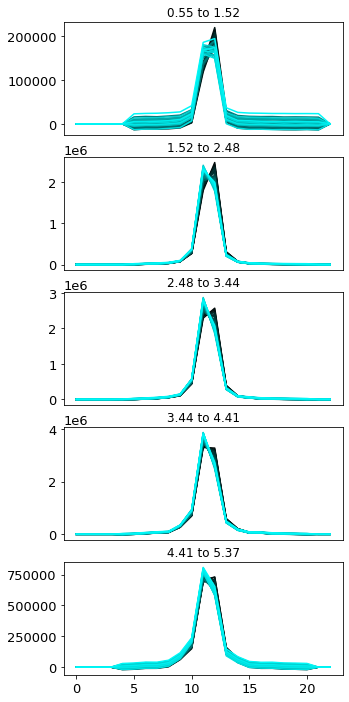

In [116]:
explore_verticalcrosscuts(cal_image)

(23,)


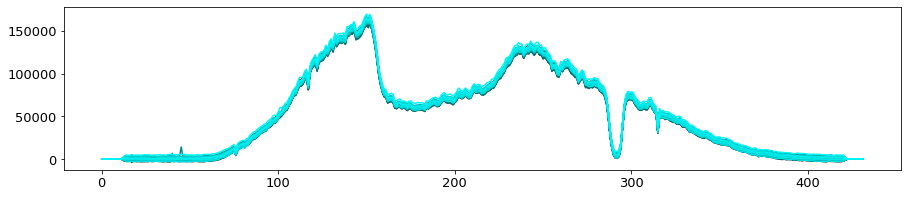

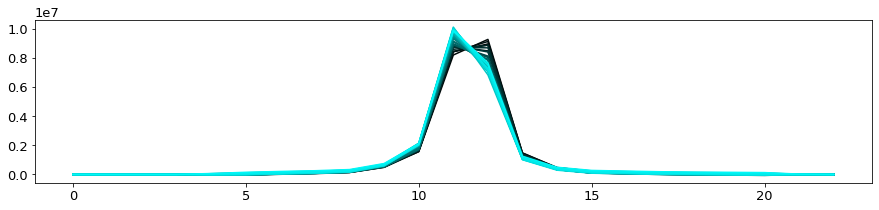

In [125]:
explore_crosscuts(cal_image)

(23,)


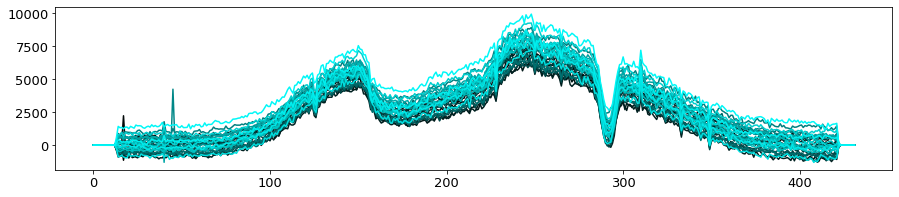

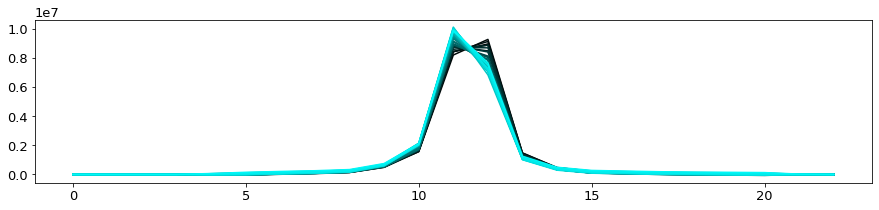

In [126]:
explore_crosscuts(cal_image,row_range=[3,10])

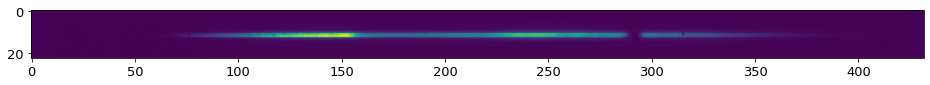

In [12]:
plt.imshow(cal_image.data[0])